# Temperatura Global

Anomalías de temperatura desde 1880 con respecto de la media de temperatura en el rango de años 1850-1900.

![global_map](images/global_map.png)


**Fuentes:** 
+ https://data.giss.nasa.gov/gistemp/
+ https://www.metoffice.gov.uk/hadobs/
+ https://www.ncdc.noaa.gov/cag/global/time-series

[Descarga directa de los datos de anomalías de temperatura (global)](https://www.metoffice.gov.uk/hadobs/hadcrut4/data/current/time_series/HadCRUT.4.6.0.0.monthly_ns_avg.txt)

[Descarga directa de los datos de anomalías de temperatura 2 (global)](https://www.metoffice.gov.uk/hadobs/hadcrut5/)

[Descarga directa de los datos de anomalías de temperatura (mapa)](https://data.giss.nasa.gov/pub/gistemp/gistemp1200_GHCNv4_ERSSTv5.nc.gz)

In [1]:
# librerias

import numpy as np

import pandas as pd  # dataframe
import xarray as xr

import pylab as plt   # graficos
from matplotlib.animation import FuncAnimation


import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature  # mapa global


%matplotlib notebook
plt.rcParams['animation.embed_limit'] = 2**128

# prediccion
from fbprophet import Prophet

import warnings
warnings.filterwarnings('ignore')

/Users/iudh/miniforge3/envs/tensor/lib/python3.8/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


## Anomalías de temperatura por meses

In [2]:
# cargar datos

data=pd.read_csv('data/HadCRUT.5.0.1.0.analysis.summary_series.global.monthly.csv')

data.head()

Year  Anomaly
0  1880.04    -2.59
1  1880.13    -2.39
2  1880.21    -1.56
3  1880.29    -0.63
4  1880.38     0.37

In [3]:
# transformar datos

data['year']=data.Year.apply(lambda x: int(str(x).split('.')[0]))
data['month']=data.Year.apply(lambda x: int(str(x).split('.')[1]))

data.drop('Year', axis=1, inplace=True)

data.rename(columns={'Anomaly': 'anomaly'}, inplace=True)

months=dict(zip(data.month.unique(), [i for i in range(1, 13)]))

data.month=data.month.apply(lambda x: months[x])

data.head()

anomaly  year  month
0    -2.59  1880      1
1    -2.39  1880      2
2    -1.56  1880      3
3    -0.63  1880      4
4     0.37  1880      5

In [4]:
data.year.min(), data.year.max()

(1880, 2022)

In [5]:
months=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

<IPython.core.display.Javascript object>


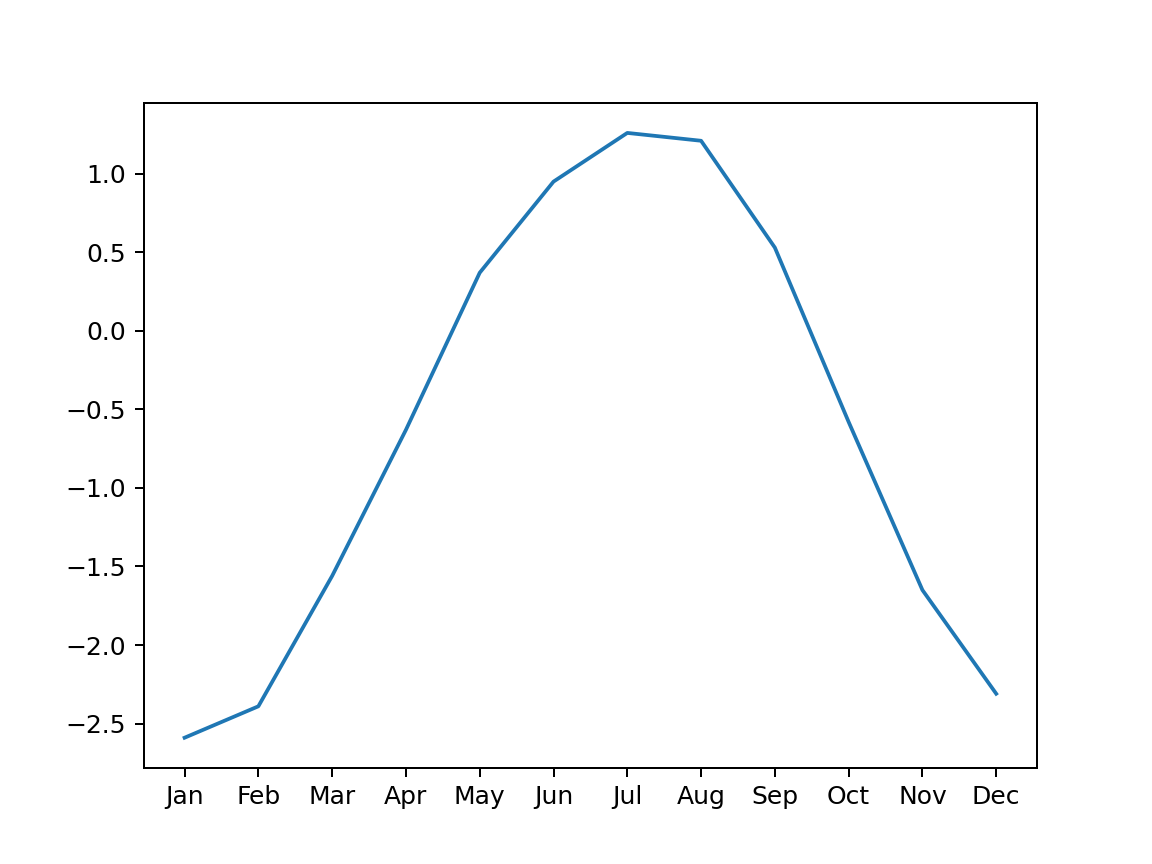

In [6]:
plt.plot(months, data.anomaly[data.year==1880]);

<IPython.core.display.Javascript object>


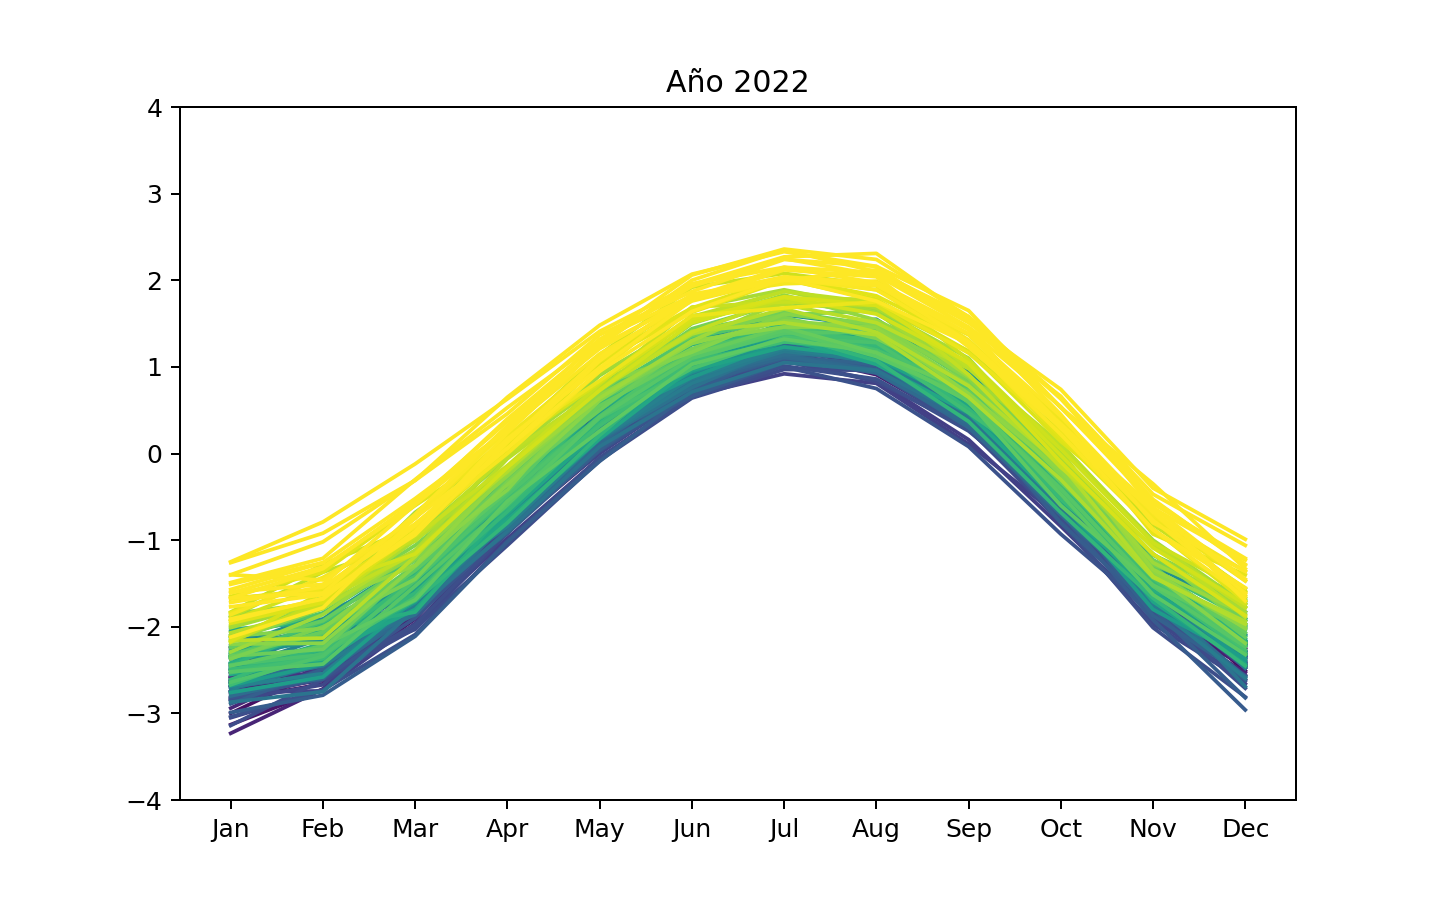

In [7]:
fig=plt.figure(figsize=(8,5))
ax=plt.subplot(111)

plt.ylim(-4, 4)


def animation(i):
 
    plt.title(f'Año {1880 + i}')

    data_plot=data.anomaly[data.year==1880 + i]    
    
    ax.plot(months[:len(data_plot)], 
            data_plot, 
            c=plt.cm.viridis(i*2));
    
    return ax



anim=FuncAnimation(fig, 
                   animation, 
                   frames=len(data.year.unique()),
                   interval=200, 
                   repeat=False)

### Anomalías de temperatura por meses (visualización polar, en espiral)

In [8]:
data_polar=pd.read_csv('data/HadCRUT.5.0.1.0.analysis.summary_series.global.monthly.polar.csv')

data_polar.head()

time   anomaly
0  1850-01-01  0.825436
1  1850-02-01  1.166584
2  1850-03-01  0.908677
3  1850-04-01  0.911279
4  1850-05-01  0.991815

In [9]:
data_polar['year']=data_polar.time.apply(lambda x: x.split('-')[0]).astype(int)
data_polar['month']=data_polar.time.apply(lambda x: x.split('-')[1]).astype(int)

data_polar.head()

time   anomaly  year  month
0  1850-01-01  0.825436  1850      1
1  1850-02-01  1.166584  1850      2
2  1850-03-01  0.908677  1850      3
3  1850-04-01  0.911279  1850      4
4  1850-05-01  0.991815  1850      5

In [10]:
data_polar.year.min(), data_polar.year.max()

(1850, 2022)

<IPython.core.display.Javascript object>


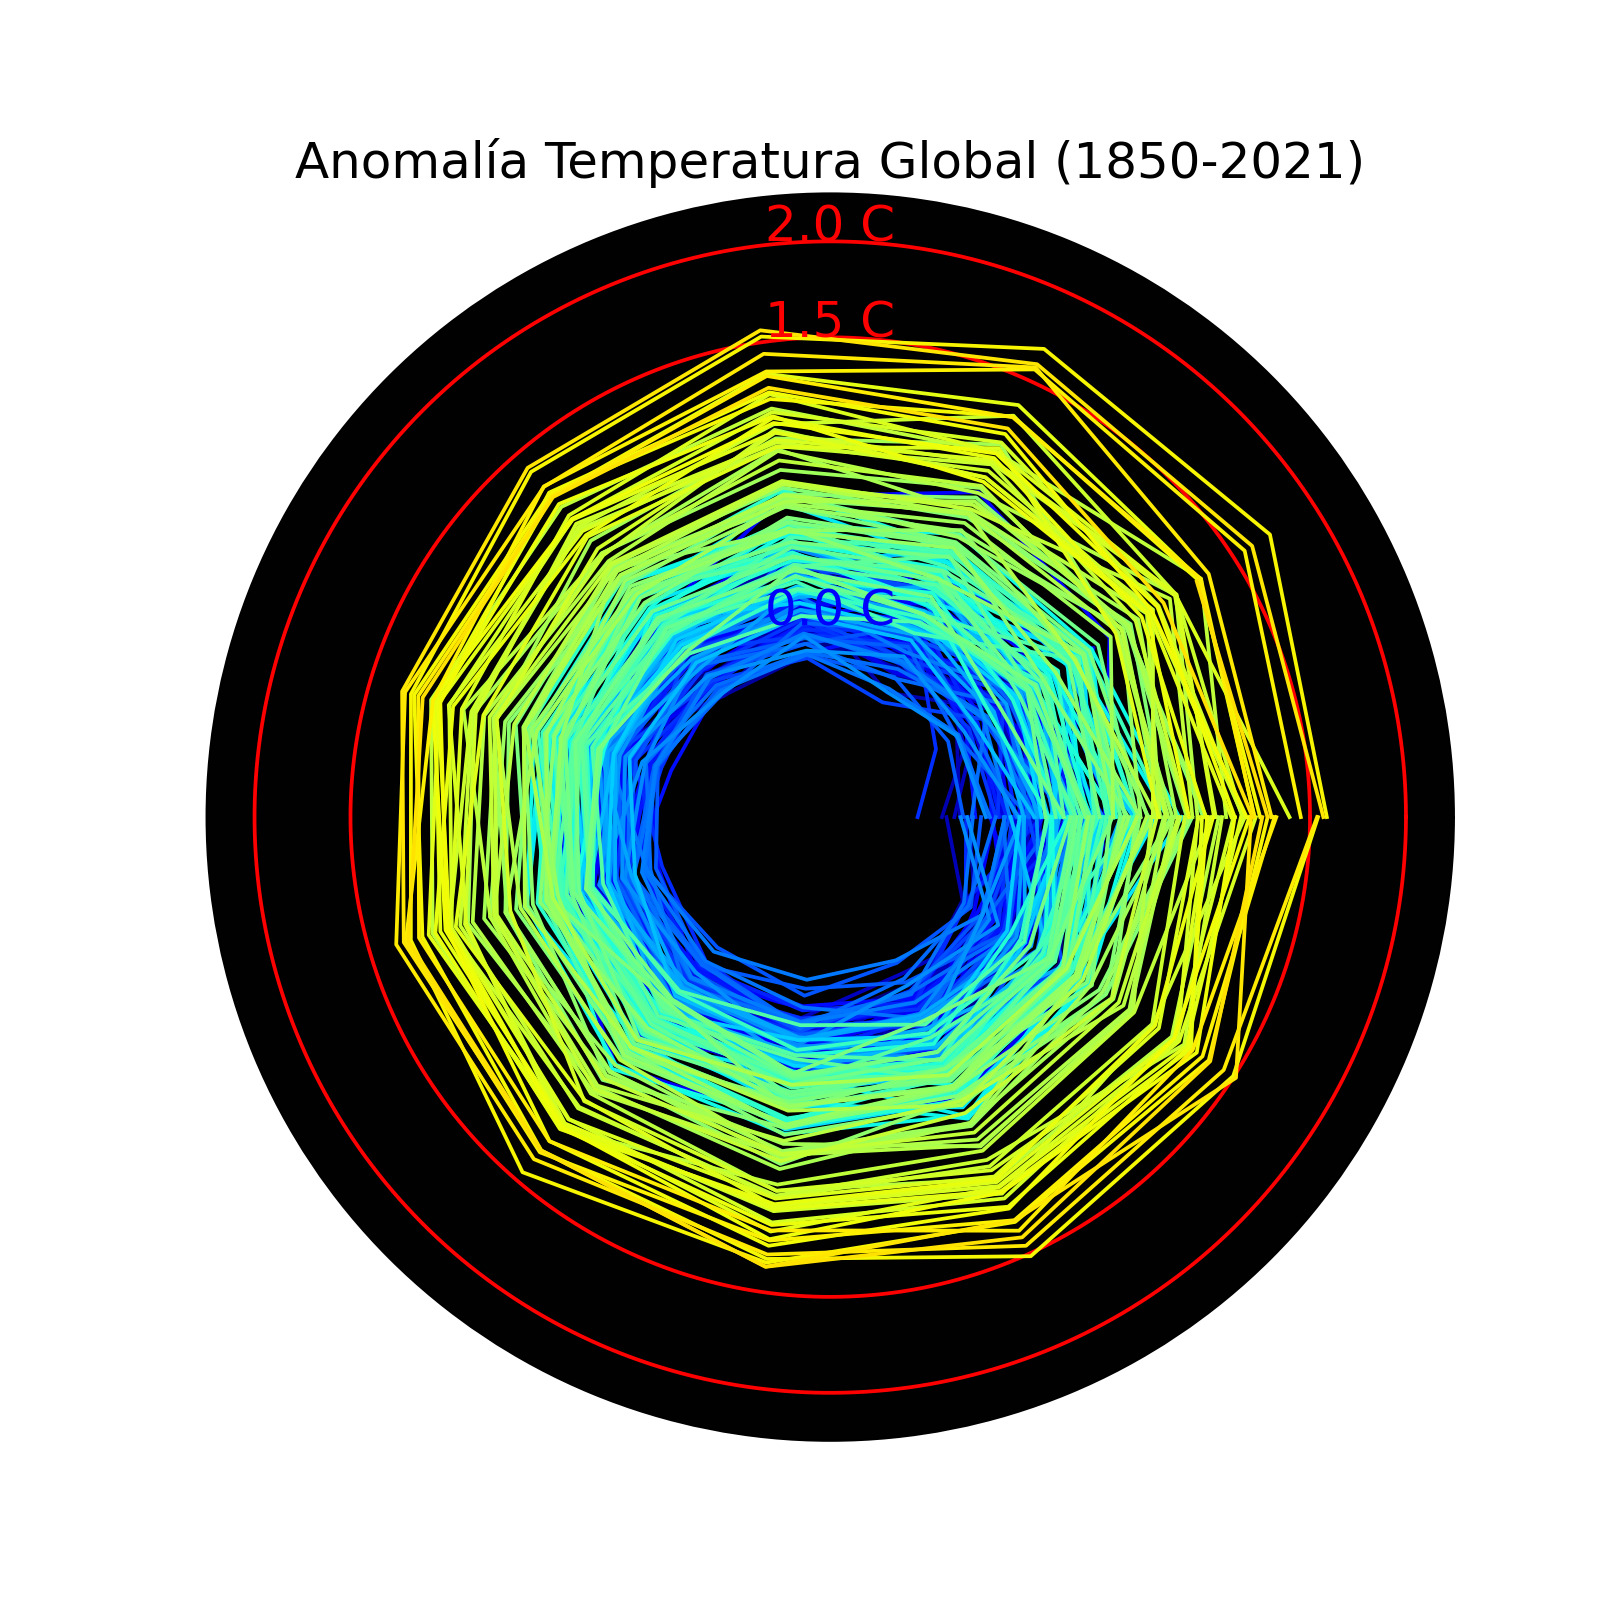

In [11]:
# creacion de array de angulos
theta=np.linspace(0, 2*np.pi, 12)  # para 12 meses, representacion de datos

# inicia figura
fig=plt.figure(figsize=(9,9))
ax=plt.subplot(111, projection='polar')


# circulos informativos, azul=0ºC, rojo=1.5 y 2ºC por encima de la media
ax.plot(np.linspace(0, 2*np.pi, 1000), [1. for _ in range(1000)], c='blue')
ax.plot(np.linspace(0, 2*np.pi, 1000), [2.5 for _ in range(1000)], c='red')
ax.plot(np.linspace(0, 2*np.pi, 1000), [3. for _ in range(1000)], c='red')

ax.text(np.pi/2, 1.0, '0.0 C', color='blue', ha='center', fontdict={'fontsize': 20})
ax.text(np.pi/2, 2.5, '1.5 C', color='red', ha='center', fontdict={'fontsize': 20})
ax.text(np.pi/2, 3.0, '2.0 C', color='red', ha='center', fontdict={'fontsize': 20})

# elimina etiquetas
ax.axes.get_yaxis().set_ticklabels([])
ax.axes.get_xaxis().set_ticklabels([])

# setup
ax.set_ylim(0, 3.25)
ax.set_facecolor('#000100')
ax.grid(False)

# bucle para representar cada año
years=data_polar.year.unique()


for i, year in enumerate(years):
    
    # datos
    data_plot=data_polar[data_polar.year==year].anomaly 
    
    # visualizacion
    ax.set_title('Anomalía Temperatura Global (1850-2021)', 
                  color='black', 
                  fontdict={'fontsize': 20})

    ax.plot(theta[:len(data_plot)], 
            data_plot, 
            c=plt.get_cmap('jet')(i));

<IPython.core.display.Javascript object>


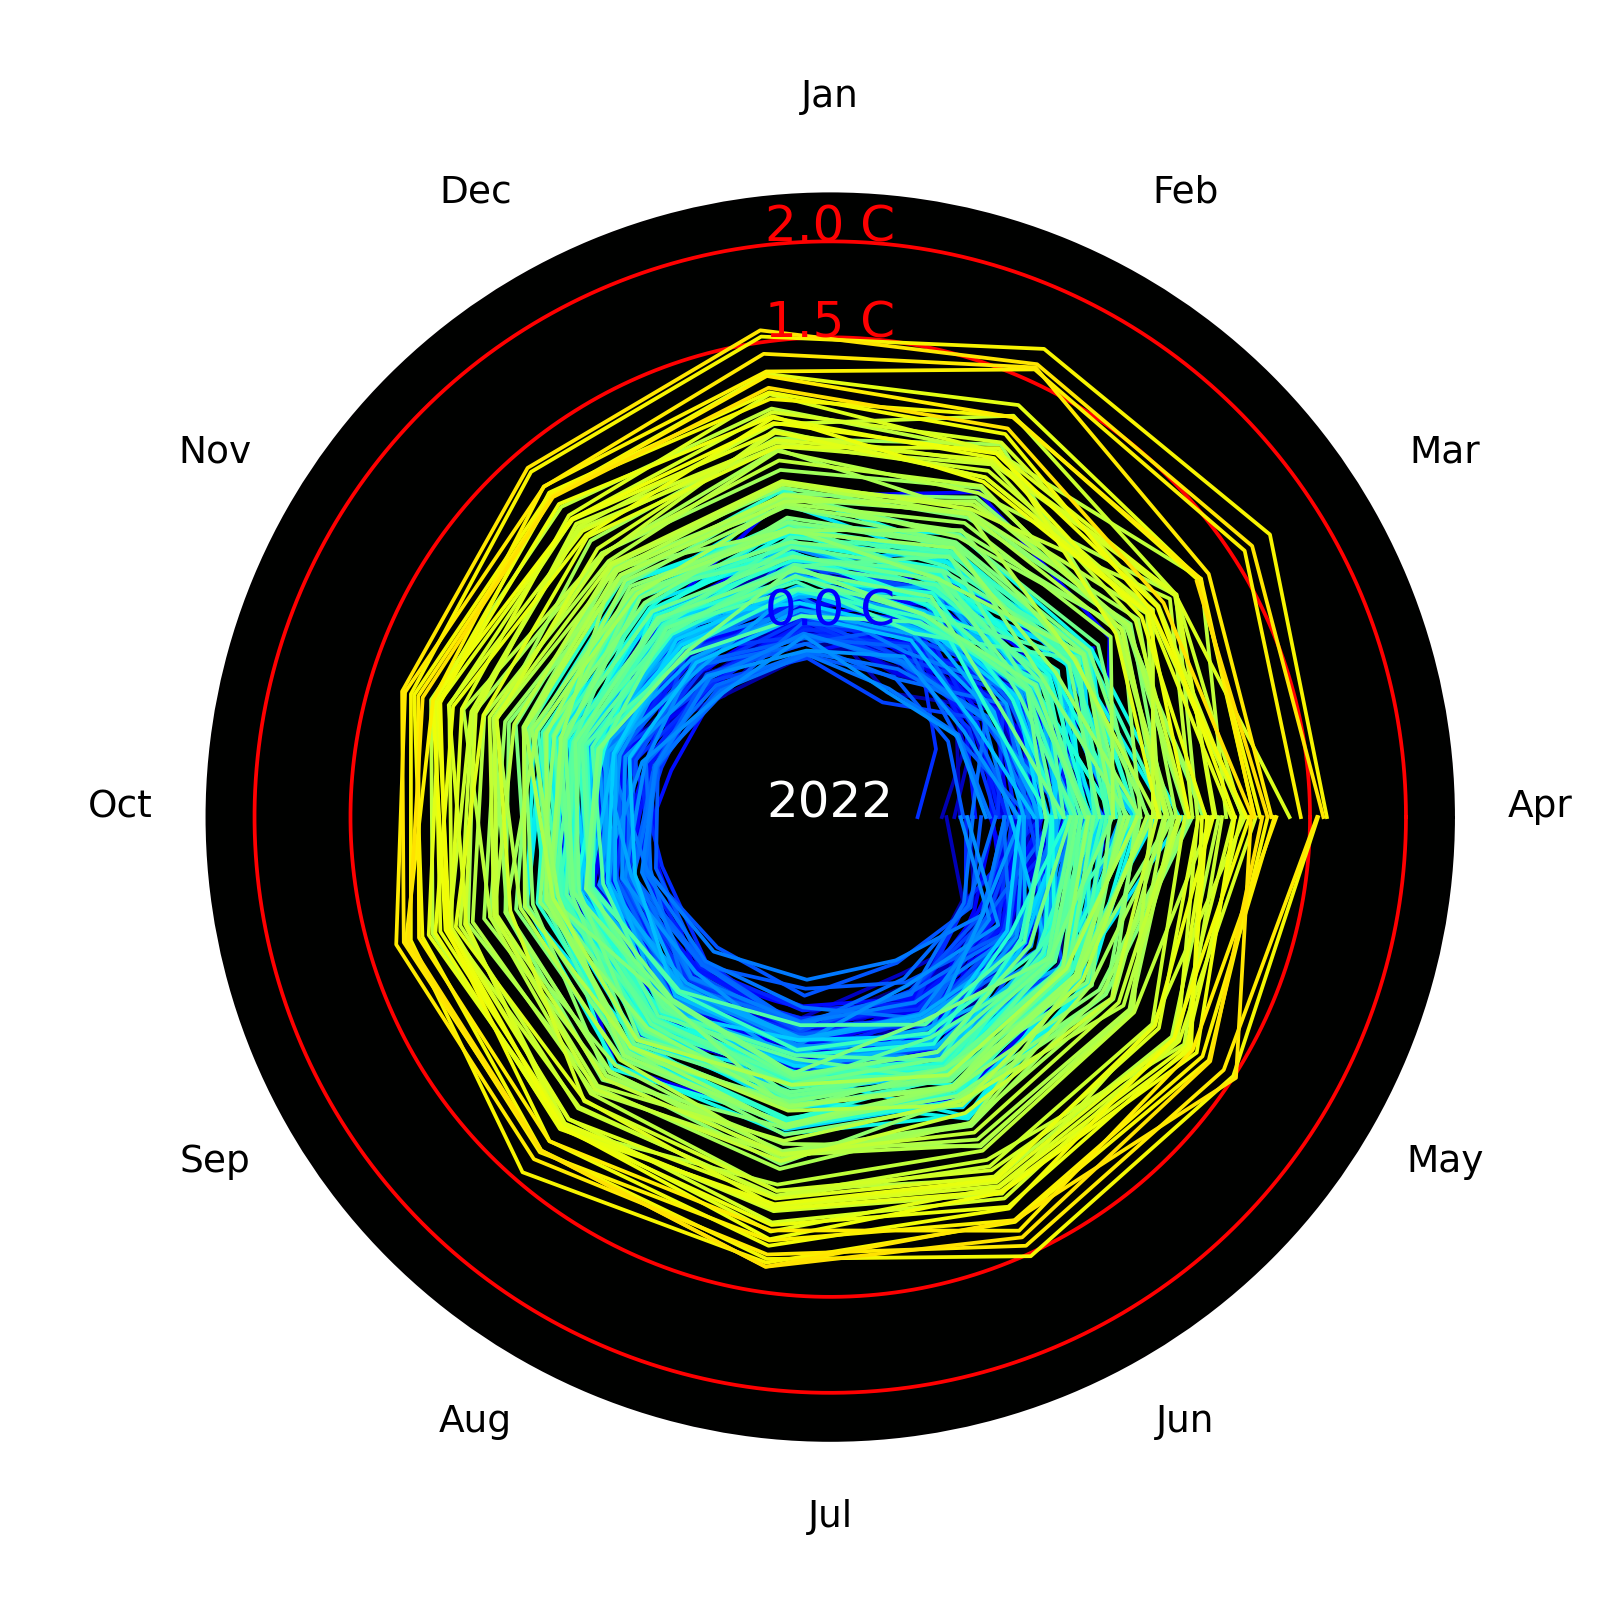

In [12]:
# creacion de array de angulos
theta=np.linspace(0, 2*np.pi, 12)  # para 12 meses, representacion de datos

# inicia figura
fig=plt.figure(figsize=(9,9))
ax=plt.subplot(111, projection='polar')


# circulos informativos, azul=0ºC, rojo=1.5 y 3ºC por encima de la media
ax.plot(np.linspace(0, 2*np.pi, 1000), [1. for _ in range(1000)], c='blue')
ax.plot(np.linspace(0, 2*np.pi, 1000), [2.5 for _ in range(1000)], c='red')
ax.plot(np.linspace(0, 2*np.pi, 1000), [3. for _ in range(1000)], c='red')

ax.text(np.pi/2, 1.0, '0.0 C', color='blue', ha='center', fontdict={'fontsize': 20})
ax.text(np.pi/2, 2.5, '1.5 C', color='red', ha='center', fontdict={'fontsize': 20})
ax.text(np.pi/2, 3.0, '2.0 C', color='red', ha='center', fontdict={'fontsize': 20})

# elimina etiquetas
ax.axes.get_yaxis().set_ticklabels([])
ax.axes.get_xaxis().set_ticklabels([])

# setup
ax.set_ylim(0, 3.25)
ax.set_facecolor('#000100')
ax.grid(False)


# bucle para representar cada año
years=data_polar.year.unique()


months_angles=np.linspace((np.pi/2)+(2*np.pi), np.pi/2, 13)

for i,month in enumerate(months):
    ax.text(months_angles[i], 3.7 ,month, color='black', fontsize=15, ha='center')

def animation(i):
    # Borra el ultimo año del centro y deja el ultimo
    for txt in ax.texts:
      if(txt.get_position()==(0,0)) and i!=len(years):
        txt.set_visible(False)
        
    # datos
    data_plot=data_polar[data_polar.year==years[i]].anomaly
    
    # visualizacion
    ax.plot(theta[:len(data_plot)], 
            data_plot, 
            c=plt.get_cmap('jet')(i))
    
    
    ax.text(0 , 0, years[i], fontsize=20, color='white',ha='center')
    
    return ax



anim=FuncAnimation(fig, 
                   animation, 
                   frames=len(years), 
                   interval=100,
                   repeat=False)

### Predicción de anomalías hasta 2050

In [13]:
data_polar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066 entries, 0 to 2065
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   time     2066 non-null   object 
 1   anomaly  2066 non-null   float64
 2   year     2066 non-null   int64  
 3   month    2066 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 64.7+ KB


In [14]:
df_prophet=data_polar[['time', 'anomaly']]

df_prophet.time=pd.to_datetime(df_prophet.time)

df_prophet.columns=['ds', 'y']

df_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066 entries, 0 to 2065
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      2066 non-null   datetime64[ns]
 1   y       2066 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 32.4 KB


In [15]:
%%time
model=Prophet().fit(df_prophet)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -13.3944
CPU times: user 723 ms, sys: 44.1 ms, total: 767 ms
Wall time: 1.15 s
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4865.56    0.00518298       746.515      0.1371           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4887.43     0.0153729       374.822      0.4766           1      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4891.05   0.000772425       90.7474           1           1      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     342       4891.64   0.000110691       123.311   7.813e-07       0.001      459  LS failed, Hessian reset 
     399       4892.09   0.000415862       84.9277           1           1      529   
    Iter      log prob        ||dx||      ||grad||       alpha

<IPython.core.display.Javascript object>


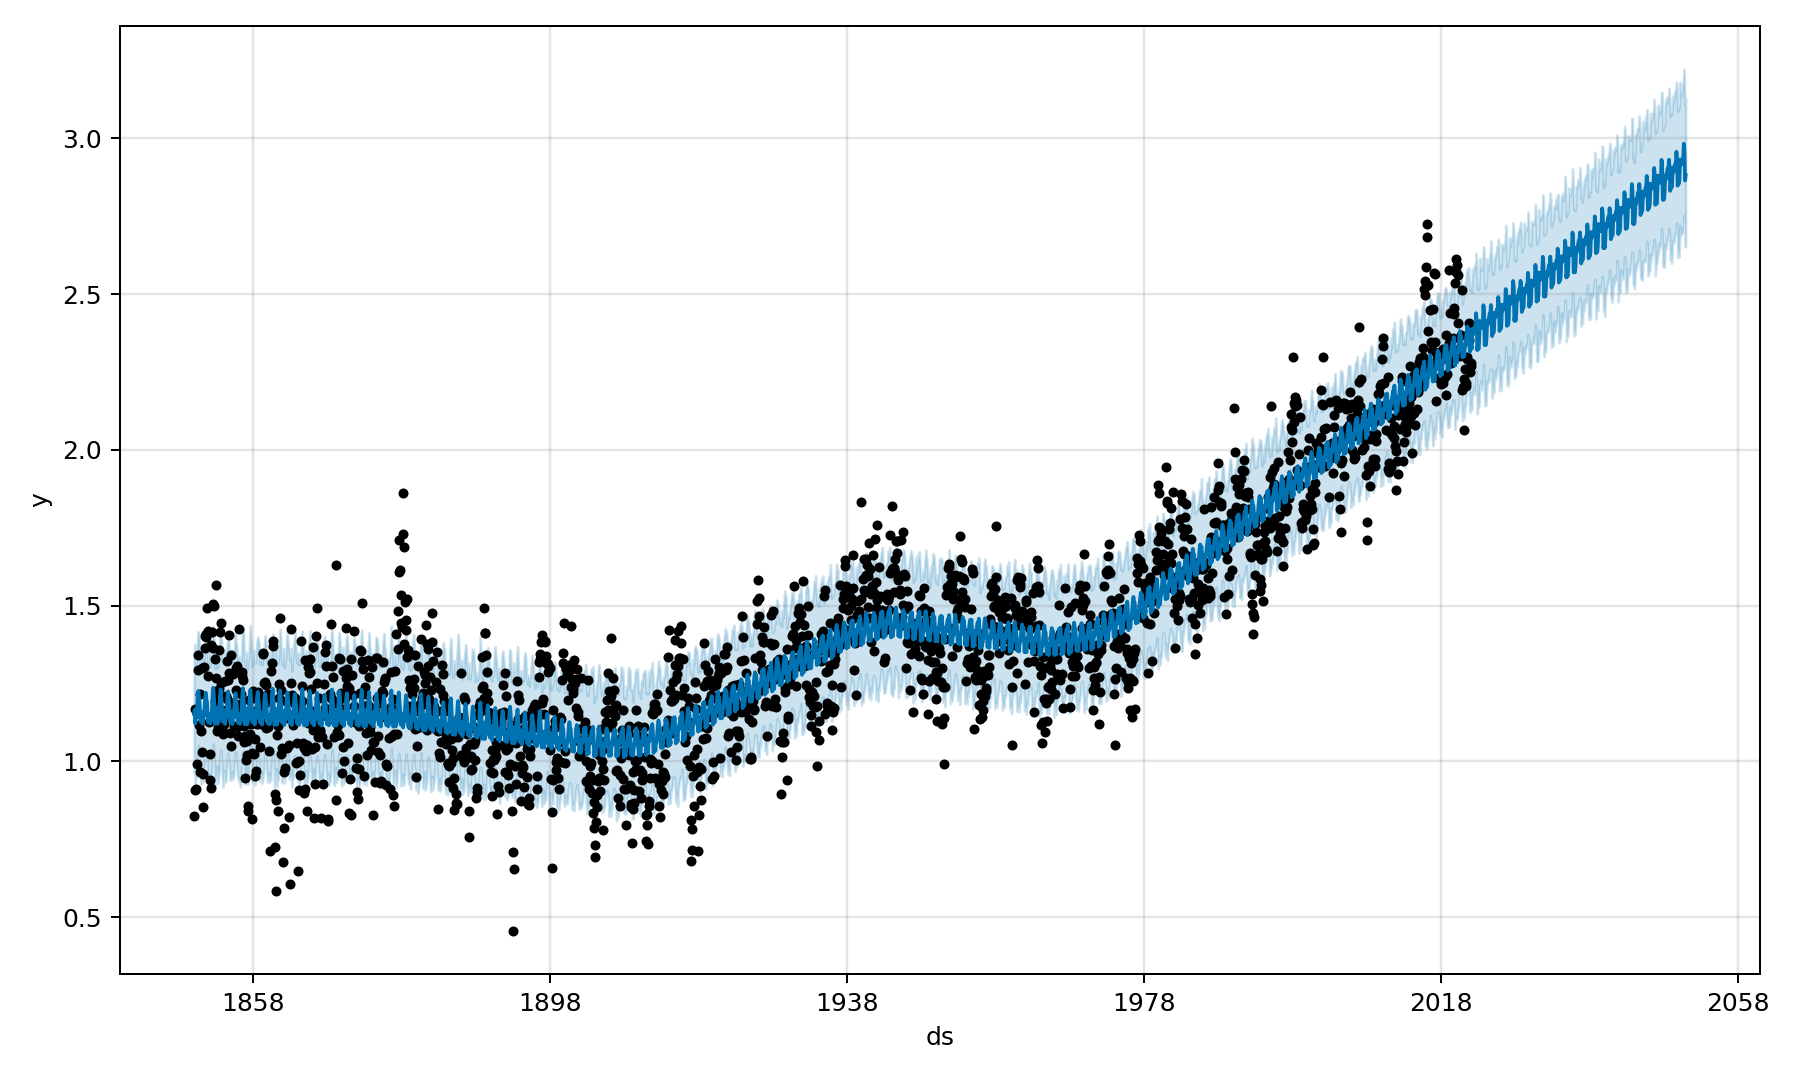

In [16]:
# desde marzo del 2022 hasta diciembre del 2050

future=model.make_future_dataframe(periods=347, freq='M')

forecast=model.predict(future)

fig=model.plot(forecast)

In [17]:
forecast=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']][forecast.ds>'2022-03-01']

forecast.columns=['time', 'anomaly', 'lower', 'upper']

forecast.head()

time   anomaly     lower     upper
2067 2022-03-31  2.388002  2.187144  2.579830
2068 2022-04-30  2.368849  2.177175  2.557272
2069 2022-05-31  2.376878  2.177304  2.571715
2070 2022-06-30  2.376740  2.202221  2.587354
2071 2022-07-31  2.388721  2.178320  2.593802

In [18]:
# añadimos algo de desviacion a la prediccion, para el plot (comentar esta casilla para ver prediccion en crudo)

forecast_noise=pd.DataFrame()

forecast_noise['time']=forecast.time

forecast_noise['anomaly']=np.random.uniform(forecast.lower, forecast.upper)

forecast_noise.head()

time   anomaly
2067 2022-03-31  2.575208
2068 2022-04-30  2.401128
2069 2022-05-31  2.423627
2070 2022-06-30  2.228935
2071 2022-07-31  2.317346

In [19]:
data_polar[['time', 'anomaly']].tail()

time   anomaly
2061  2021-10-01  2.407391
2062  2021-11-01  2.353572
2063  2021-12-01  2.251281
2064  2022-01-01  2.278899
2065  2022-02-01  2.270426

In [20]:
total_df=pd.concat([data_polar[['time', 'anomaly']], forecast_noise], axis=0)

total_df.time=total_df.time.astype(str)

total_df['year']=total_df.time.apply(lambda x: x.split('-')[0]).astype(int)
total_df['month']=total_df.time.apply(lambda x: x.split('-')[1]).astype(int)

total_df.head()

time   anomaly  year  month
0  1850-01-01  0.825436  1850      1
1  1850-02-01  1.166584  1850      2
2  1850-03-01  0.908677  1850      3
3  1850-04-01  0.911279  1850      4
4  1850-05-01  0.991815  1850      5

In [21]:
total_df.tail()

time   anomaly  year  month
2408  2050-08-31 00:00:00  3.099141  2050      8
2409  2050-09-30 00:00:00  2.847410  2050      9
2410  2050-10-31 00:00:00  2.919988  2050     10
2411  2050-11-30 00:00:00  2.770045  2050     11
2412  2050-12-31 00:00:00  2.947895  2050     12

<IPython.core.display.Javascript object>


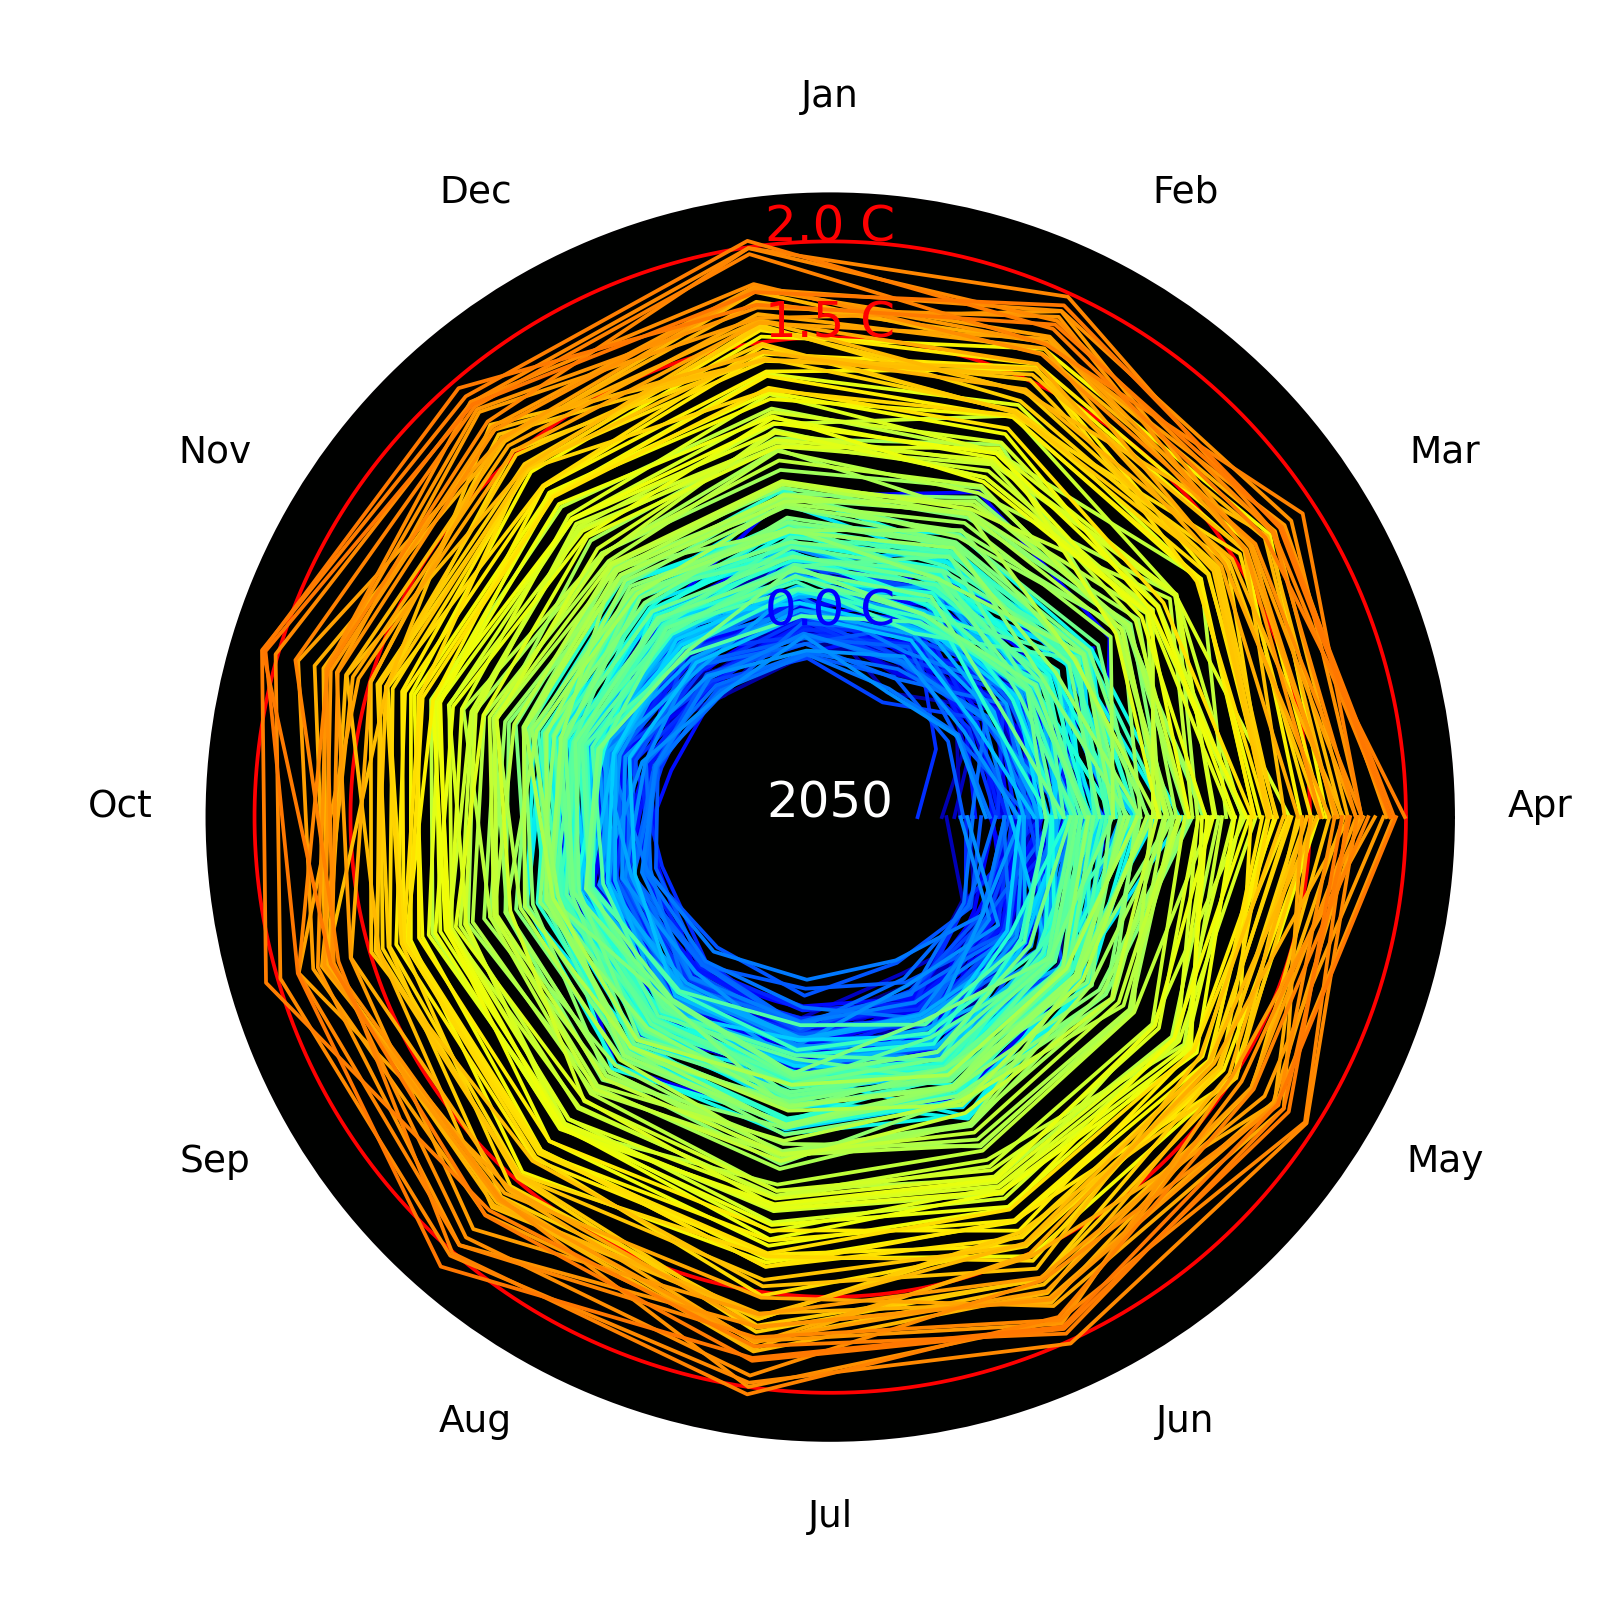

In [22]:
# creacion de array de angulos
theta=np.linspace(0, 2*np.pi, 12)  # para 12 meses, representacion de datos

# inicia figura
fig=plt.figure(figsize=(9,9))
ax=plt.subplot(111, projection='polar')


# circulos informativos, azul=0ºC, rojo=1.5 y 3ºC por encima de la media
ax.plot(np.linspace(0, 2*np.pi, 1000), [1. for _ in range(1000)], c='blue')
ax.plot(np.linspace(0, 2*np.pi, 1000), [2.5 for _ in range(1000)], c='red')
ax.plot(np.linspace(0, 2*np.pi, 1000), [3. for _ in range(1000)], c='red')

ax.text(np.pi/2, 1.0, '0.0 C', color='blue', ha='center', fontdict={'fontsize': 20})
ax.text(np.pi/2, 2.5, '1.5 C', color='red', ha='center', fontdict={'fontsize': 20})
ax.text(np.pi/2, 3.0, '2.0 C', color='red', ha='center', fontdict={'fontsize': 20})

# elimina etiquetas
ax.axes.get_yaxis().set_ticklabels([])
ax.axes.get_xaxis().set_ticklabels([])

# setup
ax.set_ylim(0, 3.25)
ax.set_facecolor('#000100')
ax.grid(False)


# bucle para representar cada año
years=total_df.year.unique()


months_angles=np.linspace((np.pi/2)+(2*np.pi), np.pi/2, 13)

for i,month in enumerate(months):
    ax.text(months_angles[i], 3.7 ,month, color='black', fontsize=15, ha='center')

def animation(i):
    # Borra el ultimo año del centro y deja el ultimo
    for txt in ax.texts:
      if(txt.get_position()==(0,0)) and i!=len(years):
        txt.set_visible(False)
        
    # datos
    data_plot=total_df[total_df.year==years[i]].anomaly
    
    # visualizacion
    ax.plot(theta[:len(data_plot)], 
            data_plot, 
            c=plt.get_cmap('jet')(i))
    
    
    ax.text(0 , 0, years[i], fontsize=20, color='white',ha='center')
    
    return ax



anim=FuncAnimation(fig, 
                   animation, 
                   frames=len(years), 
                   interval=100,
                   repeat=False)

## Mapas

In [23]:
map_df=xr.open_dataset('data/gistemp1200_GHCNv4_ERSSTv5.nc')

map_df

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 1706, nv: 2)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2022-02-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2022-03-11 09:08:31 by SBBX_to_nc 2.0 - ILAND=1200,...

In [24]:
# anual

climate=map_df.resample(time='Y').mean()

anomaly=climate['tempanomaly']

#anomaly

<IPython.core.display.Javascript object>


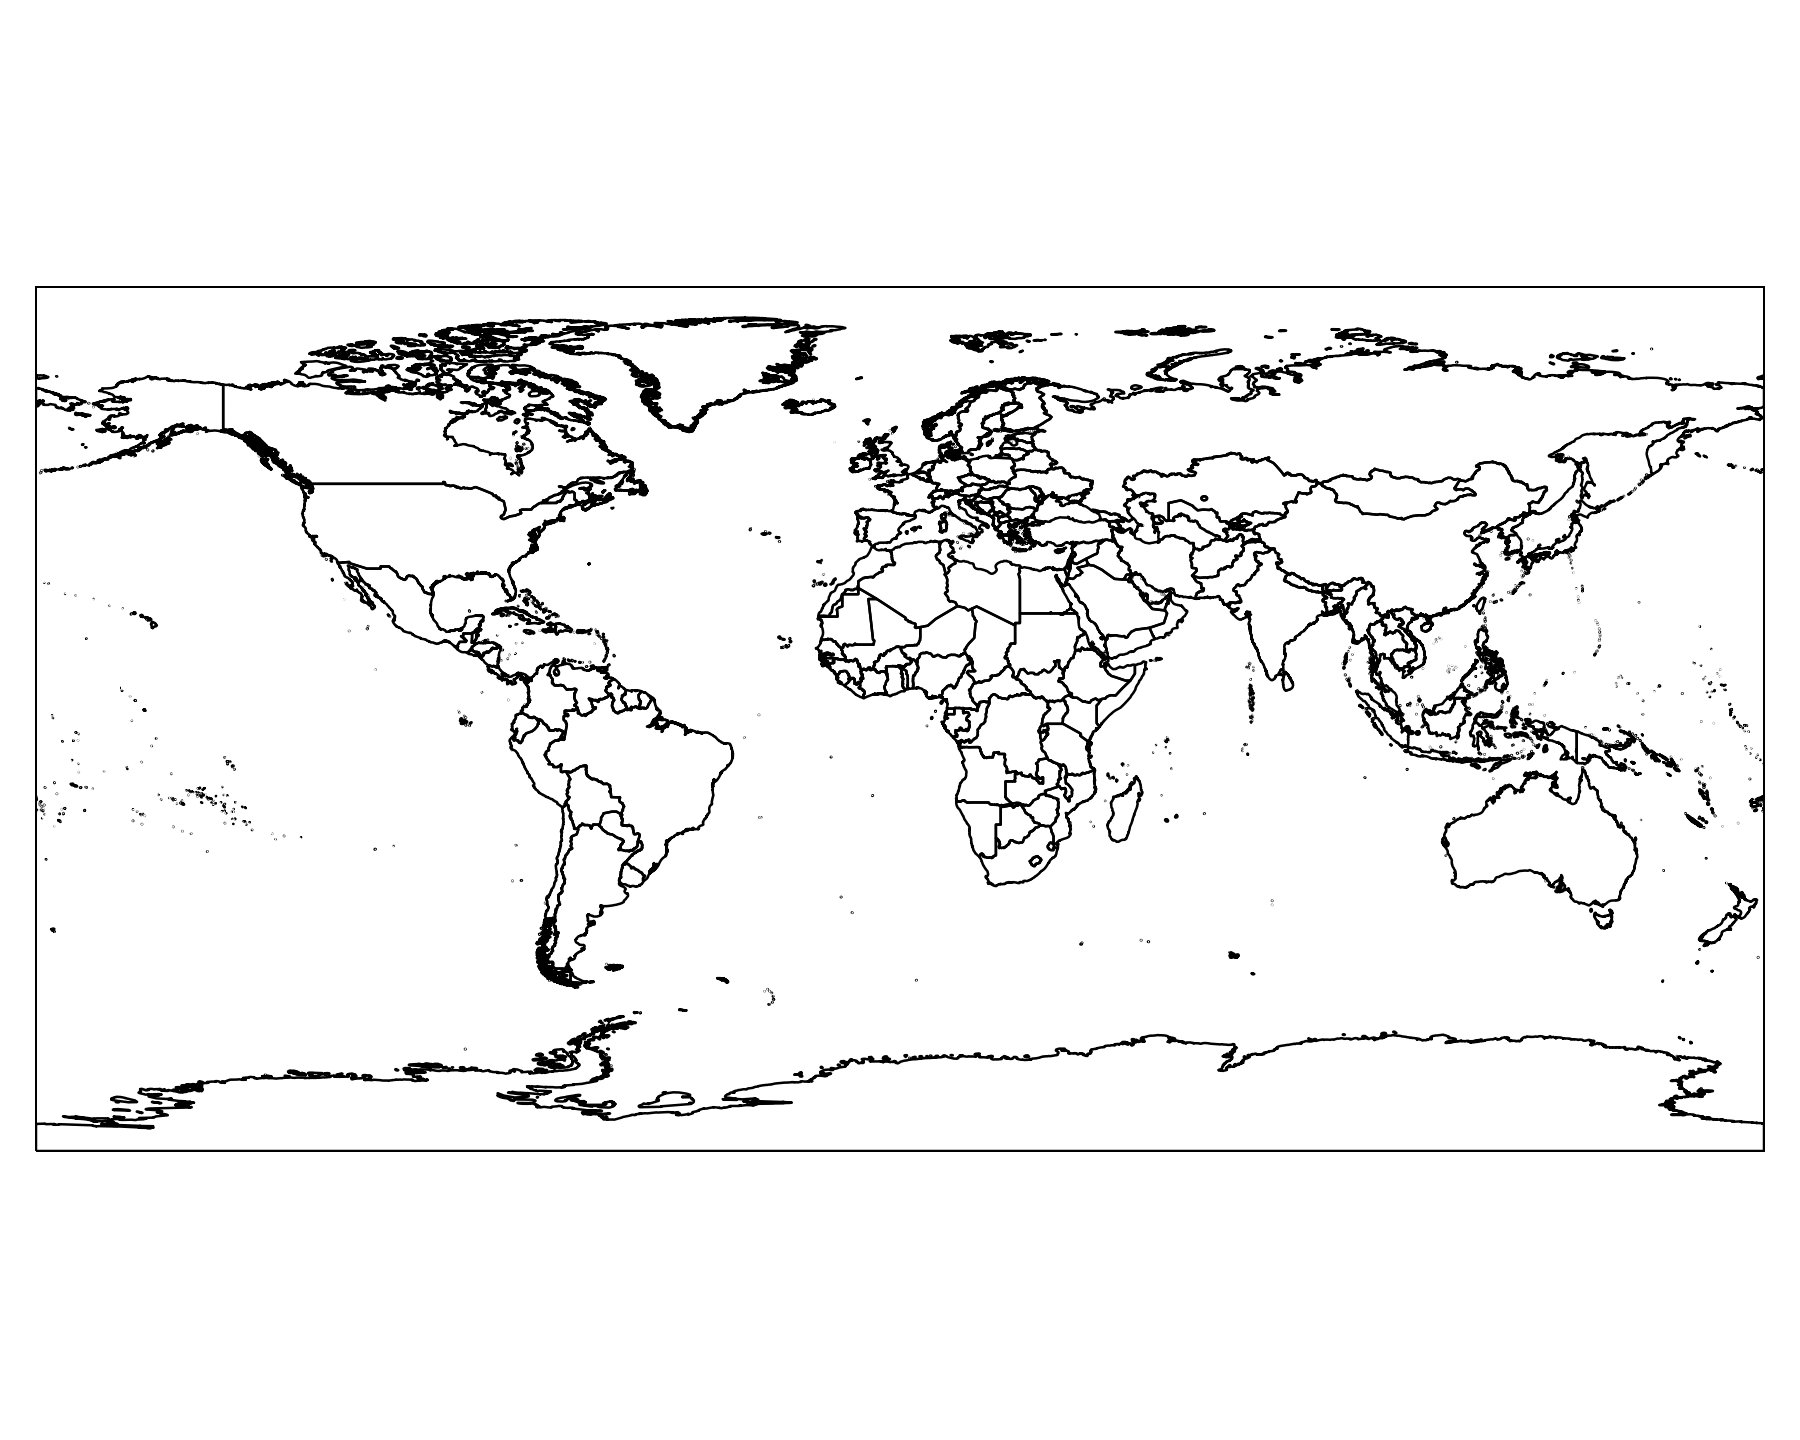

In [25]:
# se crea un mapamundi

fig = plt.figure(figsize=(10,8))
fig.subplots_adjust(left=0.02, bottom=0.04, right=0.98, top=0.96, wspace=0, hspace=0)

ax=fig.add_subplot(1,1,1, projection=ccrs.PlateCarree())

ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
               facecolor='none', edgecolor='black')

plt.show();

<IPython.core.display.Javascript object>


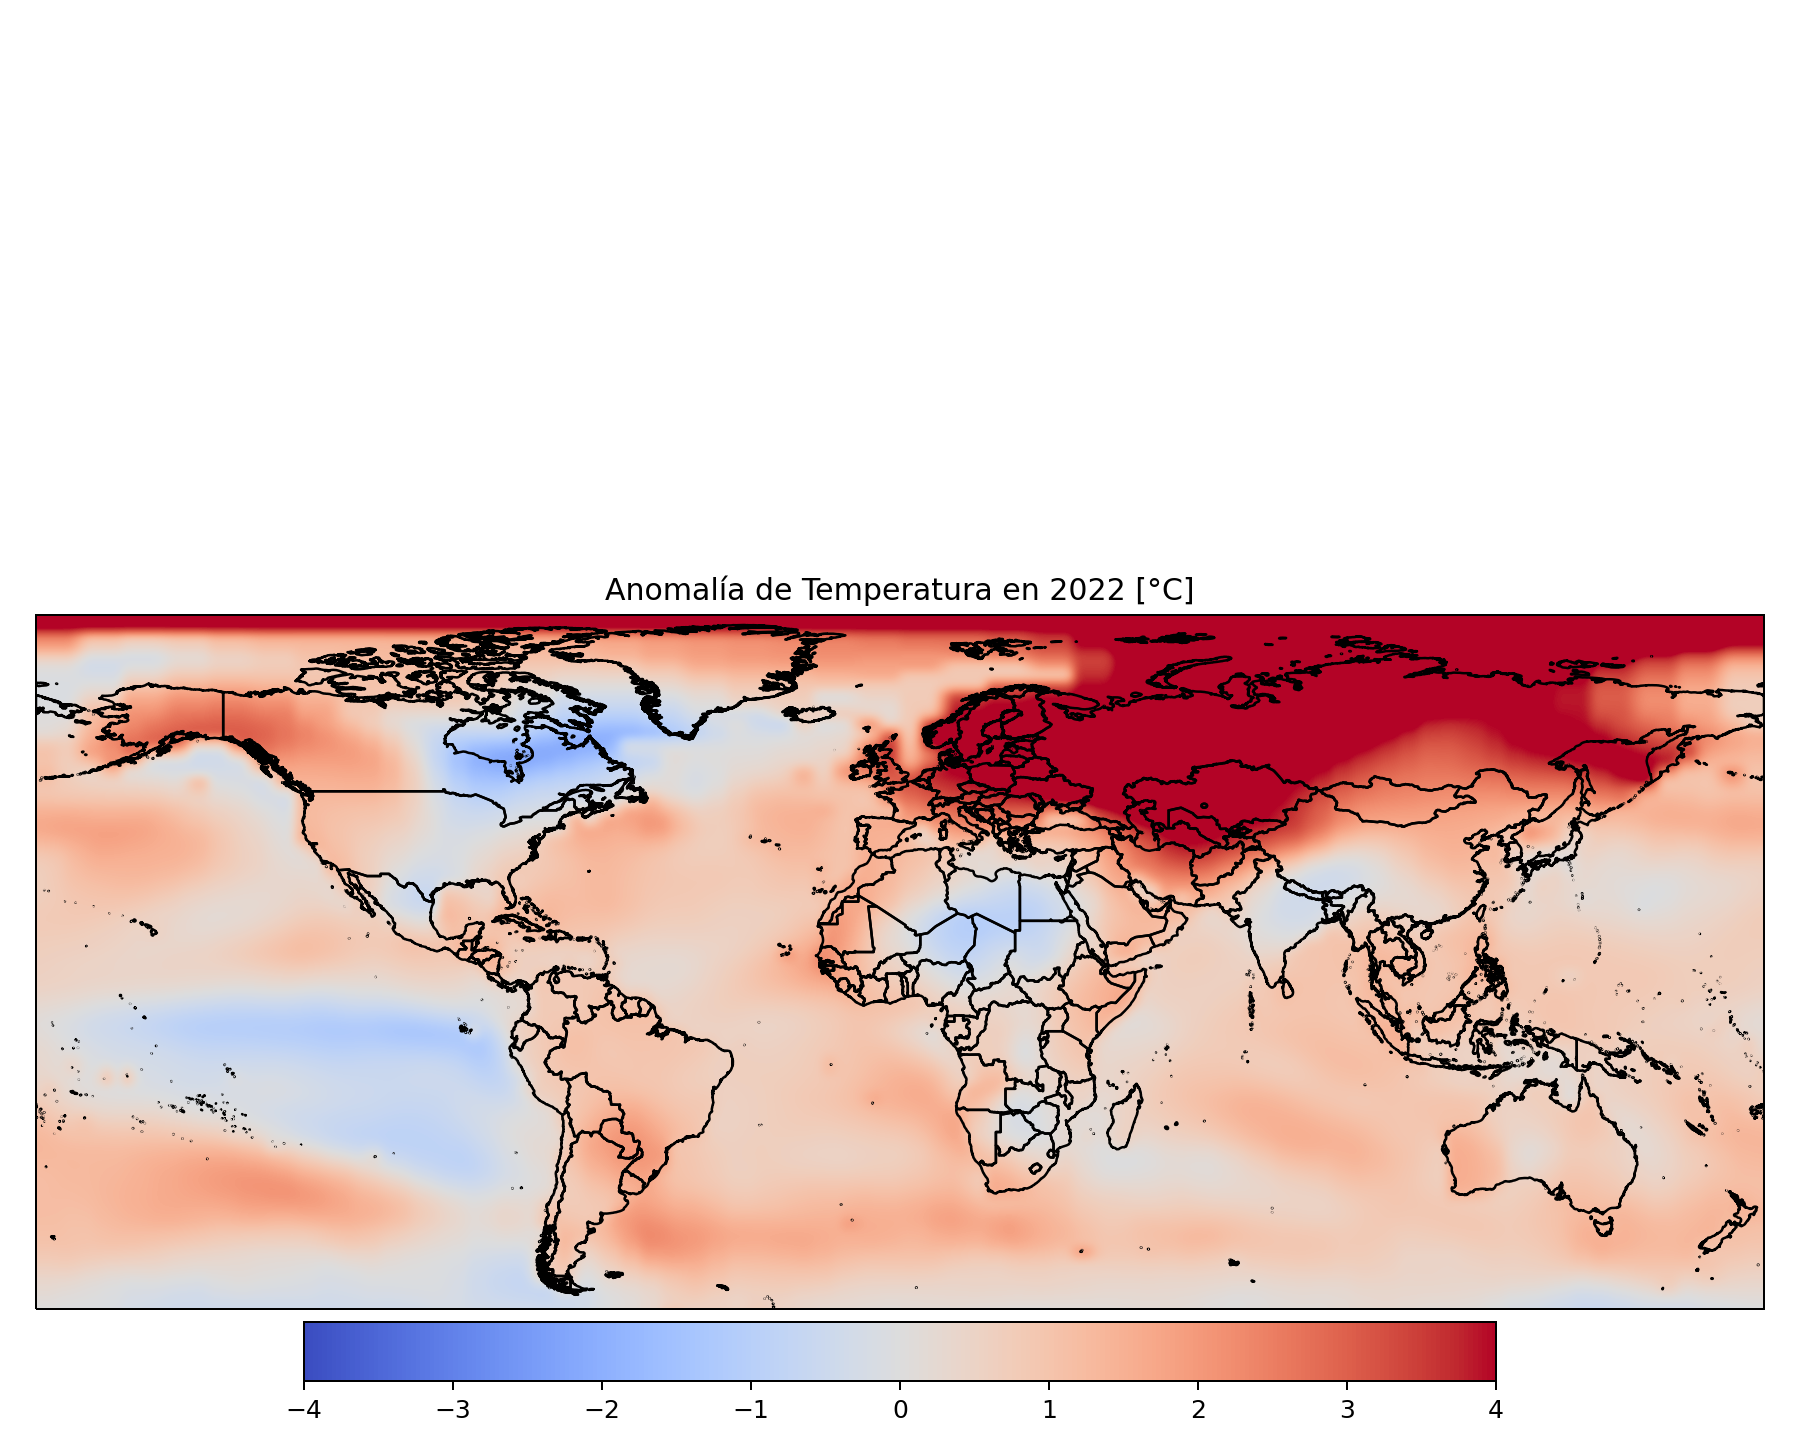

In [26]:
# se crea mapa para un año dado

# configuracion de la barra de color
cbar_kwargs = {
    'orientation':'horizontal',
    'fraction': 0.045,
    'pad': 0.01,
    'extend':'neither'
}

fig=plt.figure(figsize=(10,8))
fig.subplots_adjust(left=0.02, bottom=0.04, right=0.98, top=0.96, wspace=0, hspace=0)

ax=fig.add_subplot(1,1,1, projection = ccrs.PlateCarree())

ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'),
                       facecolor='none', edgecolor='black')

ax.set_extent([-150, 150, -55, 85])


date=pd.to_datetime(anomaly.isel(time=-1)['time'].values)

ax.set_title('Anomalía de Temperatura en '+ str(date.year) + ' [°C]')

anomaly.isel(time=-1).plot.imshow(ax=ax, add_labels=False, add_colorbar=True,
               vmin=-4, vmax=4, cmap='coolwarm',
                                 
               cbar_kwargs=cbar_kwargs, interpolation='bicubic')

plt.show();

<IPython.core.display.Javascript object>


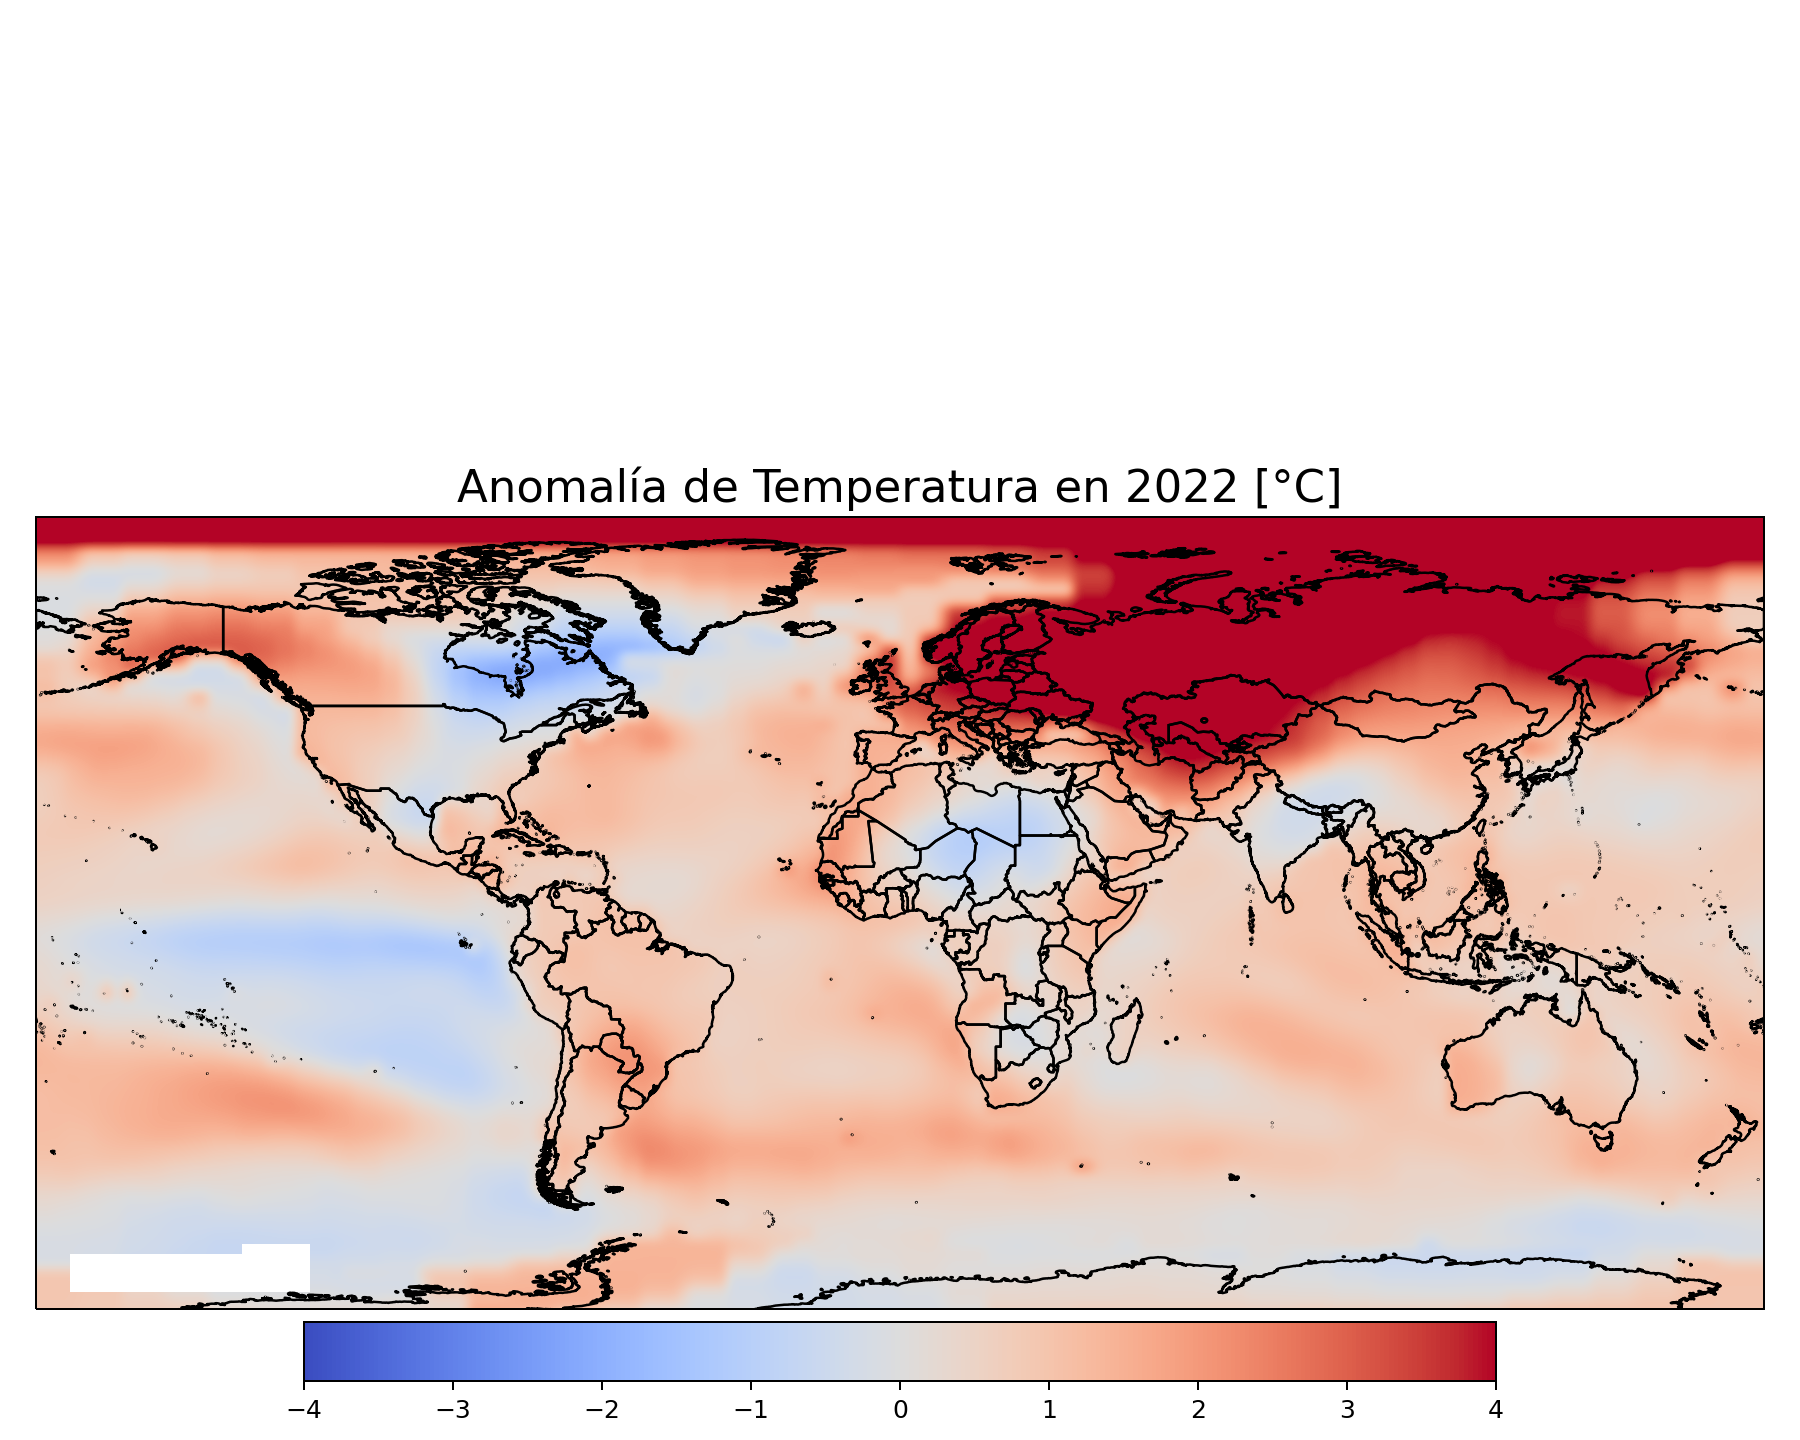

In [28]:
fig=plt.figure(figsize=(10,8))
fig.subplots_adjust(left=0.02, bottom=0.04, right=0.98, top=0.96, wspace=0, hspace=0)


ax = fig.add_subplot(111, projection=ccrs.PlateCarree())


ax.add_feature(NaturalEarthFeature('cultural', 'admin_0_countries', '10m'), 
               facecolor='none', edgecolor='black')

ax.set_extent([-110, 110, -55, 85])

image=anomaly.isel(time=0).plot.imshow(ax=ax, 
                                       vmin=-4, 
                                       vmax=4,
                                       add_labels=False,
                                       cmap='coolwarm', 
                                       animated=True,
                                       cbar_kwargs=cbar_kwargs, 
                                       interpolation='bicubic')



def animation(t):
    
    date=pd.to_datetime(anomaly.sel(time=t)['time'].values)
    
    ax.set_title('Anomalía de Temperatura en ' + str(date.year) + ' [°C]')
    ax.title.set_fontsize(18)
    
    image.set_array(anomaly.sel(time=t))
    
    return image

ani=FuncAnimation(fig, 
                  animation, 
                  frames=anomaly['time'].values,
                  interval=100,
                  repeat=False)
